In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Spotify_data - Sheet1.csv to Spotify_data - Sheet1.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder



# Load the dataset
df = pd.read_csv('Spotify_data - Sheet1.csv')

# Display basic info
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
df.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          520 non-null    object
 1   Gender                       520 non-null    object
 2   spotify_usage_period         520 non-null    object
 3   spotify_listening_device     520 non-null    object
 4   spotify_subscription_plan    520 non-null    object
 5   premium_sub_willingness      520 non-null    object
 6   preffered_premium_plan       312 non-null    object
 7   preferred_listening_content  520 non-null    object
 8   fav_music_genre              520 non-null    object
 9   music_time_slot              520 non-null    object
 10  music_Influencial_mood       520 non-null    object
 11  music_lis_frequency          520 non-null    object
 12  music_expl_method            520 non-null    object
 13  music_recc_rating    

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok



Descriptive Statistics:
          Age  Gender spotify_usage_period spotify_listening_device  \
count     520     520                  520                      520   
unique      5       3                    4                       15   
top     20-35  Female    More than 2 years               Smartphone   
freq      422     391                  169                      300   
mean      NaN     NaN                  NaN                      NaN   
std       NaN     NaN                  NaN                      NaN   
min       NaN     NaN                  NaN                      NaN   
25%       NaN     NaN                  NaN                      NaN   
50%       NaN     NaN                  NaN                      NaN   
75%       NaN     NaN                  NaN                      NaN   
max       NaN     NaN                  NaN                      NaN   

       spotify_subscription_plan premium_sub_willingness  \
count                        520                     520   
un

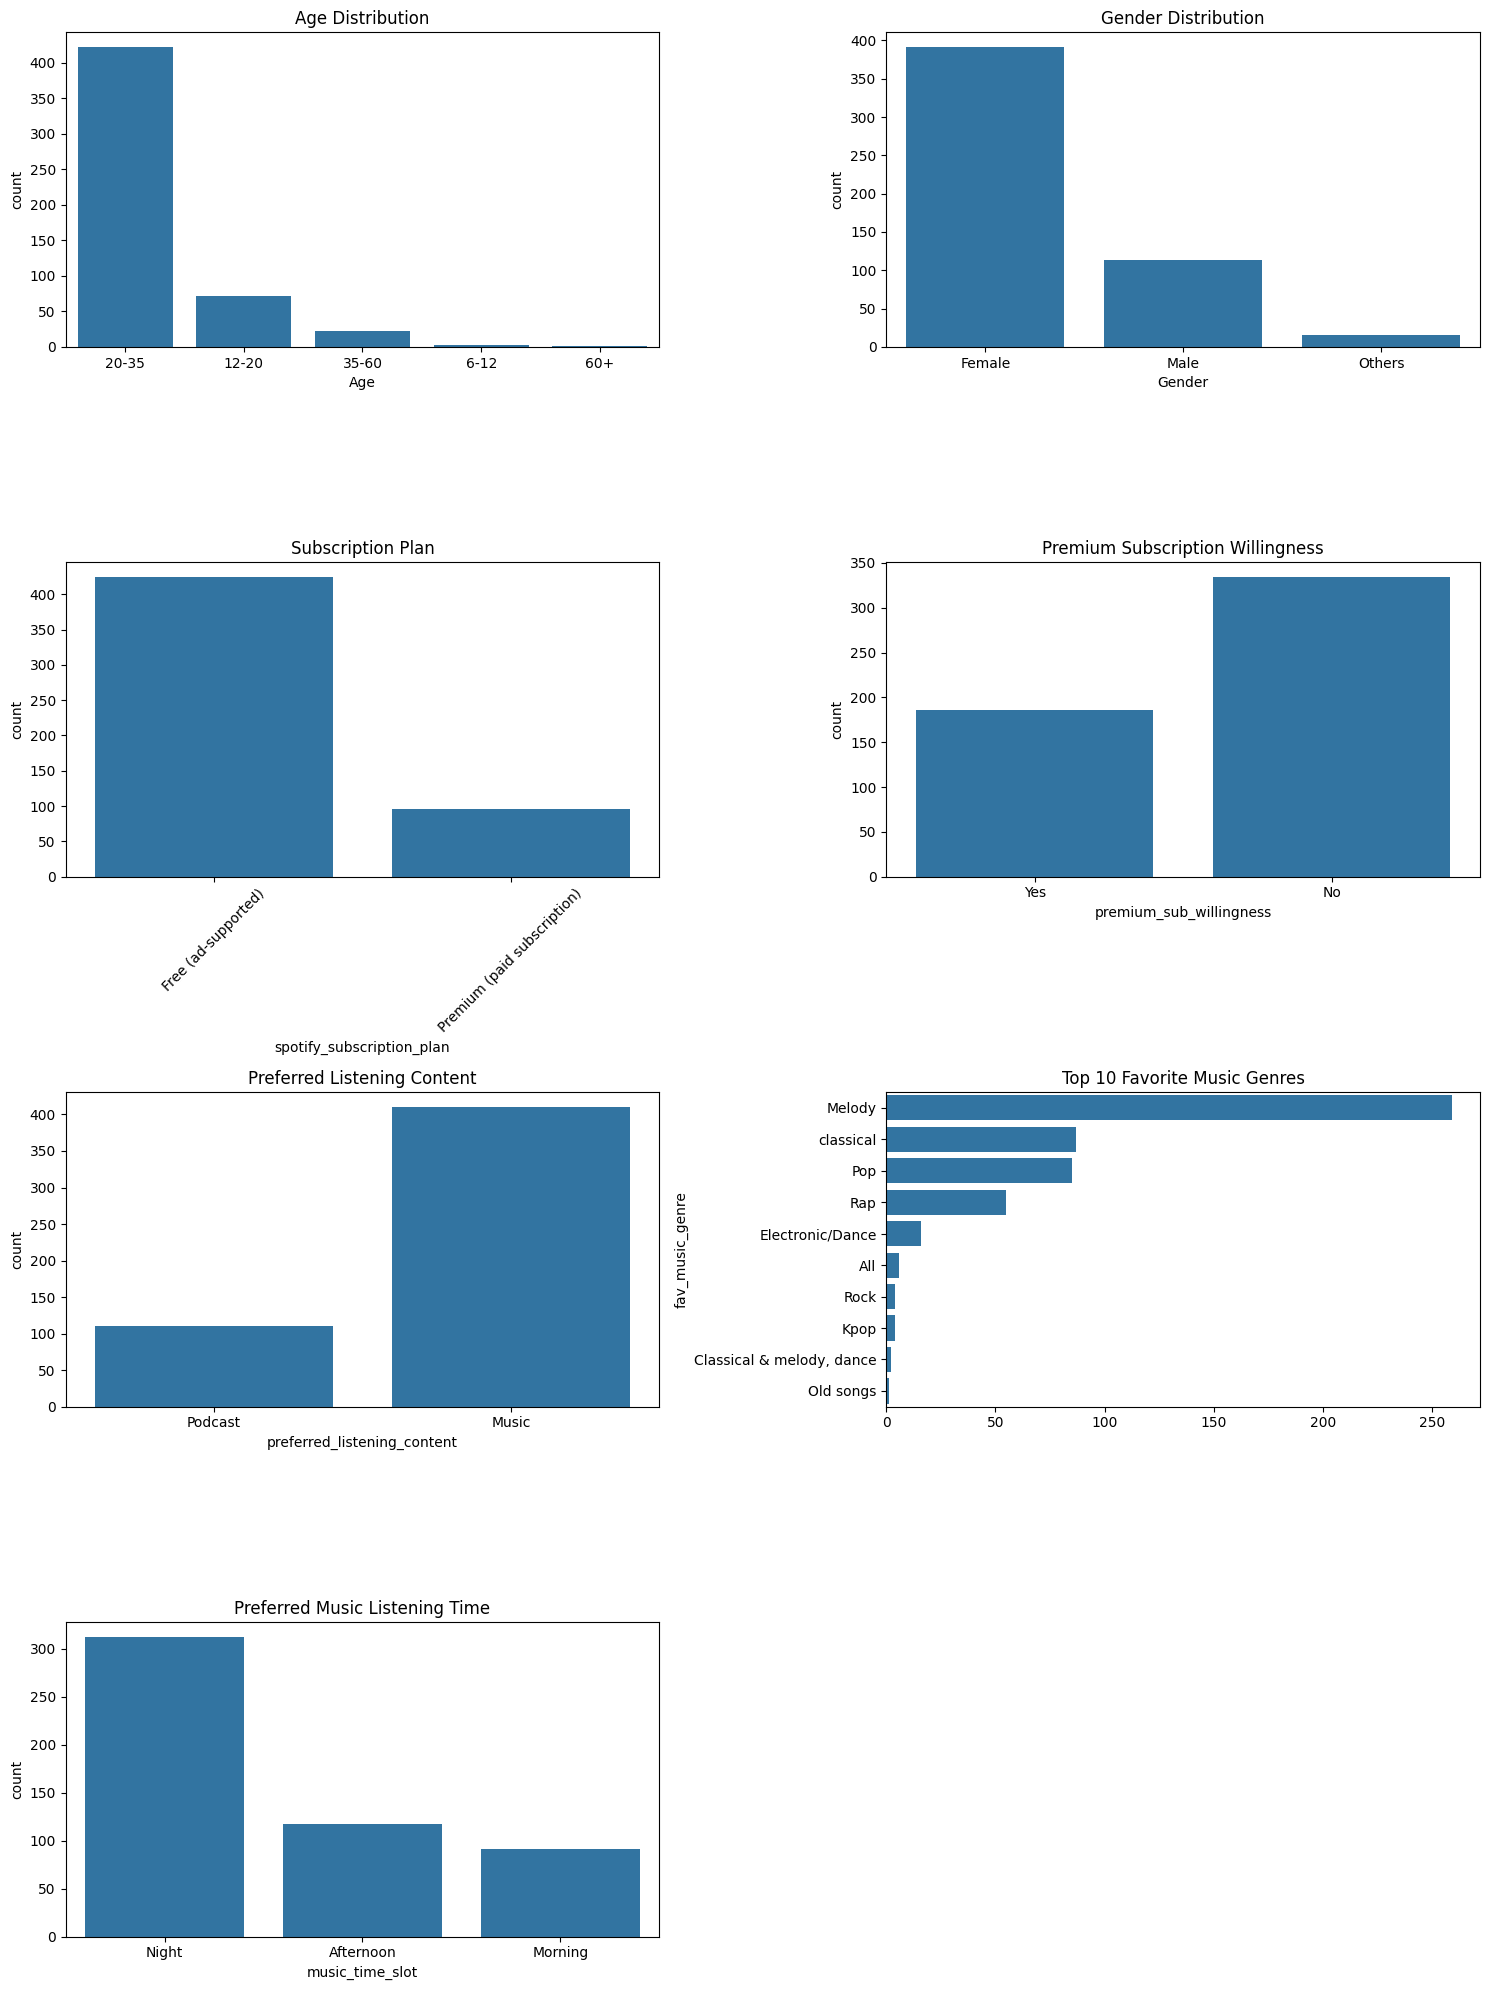

In [ ]:
# Basic statistics
print("\nDescriptive Statistics:")
print(df.describe(include='all'))

# Missing values check
print("\nMissing Values:")
print(df.isnull().sum())

# Visualizations
plt.figure(figsize=(15, 20))

# Age distribution
plt.subplot(4, 2, 1)
sns.countplot(data=df, x='Age')
plt.title('Age Distribution')

# Gender distribution
plt.subplot(4, 2, 2)
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')

# Subscription plan
plt.subplot(4, 2, 3)
sns.countplot(data=df, x='spotify_subscription_plan')
plt.title('Subscription Plan')
plt.xticks(rotation=45)

# Premium willingness
plt.subplot(4, 2, 4)
sns.countplot(data=df, x='premium_sub_willingness')
plt.title('Premium Subscription Willingness')

# Preferred content
plt.subplot(4, 2, 5)
sns.countplot(data=df, x='preferred_listening_content')
plt.title('Preferred Listening Content')

# Favorite music genre
plt.subplot(4, 2, 6)
top_genres = df['fav_music_genre'].value_counts().nlargest(10)
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 10 Favorite Music Genres')

# Music time slot
plt.subplot(4, 2, 7)
sns.countplot(data=df, x='music_time_slot')
plt.title('Preferred Music Listening Time')

plt.tight_layout()
plt.show()

# Correlation analysis for numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
if len(numerical_cols) > 1:
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

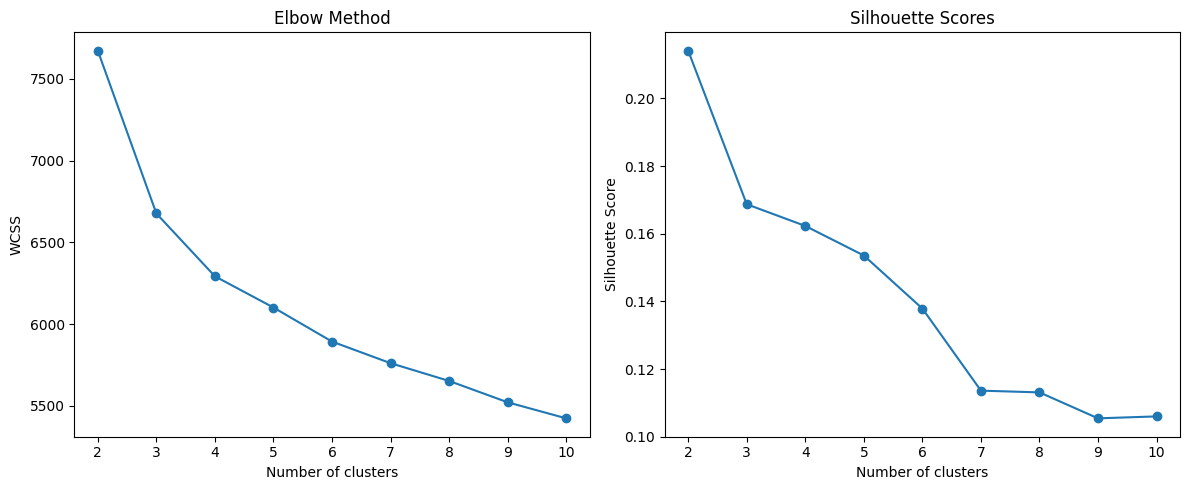

In [ ]:
# Select relevant features for clustering
cluster_features = ['spotify_listening_device','spotify_usage_period', 'spotify_subscription_plan',
                   'premium_sub_willingness', 'fav_music_genre', 'music_time_slot',
                   'music_lis_frequency', 'music_recc_rating','preffered_premium_plan','preferred_listening_content',
                    'music_Influencial_mood','music_expl_method','pod_lis_frequency',
                    'fav_pod_genre','preffered_pod_format','pod_host_preference',
                    'preffered_pod_duration','pod_variety_satisfaction']

# Create a subset dataframe
cluster_df = df[cluster_features].copy()

# Encode categorical variables
label_encoders = {}
for col in cluster_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    cluster_df[col] = le.fit_transform(cluster_df[col].astype(str))
    label_encoders[col] = le

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_df)

# Determine optimal number of clusters using elbow method
wcss = []
silhouette_scores = []
max_clusters = 10

for i in range(2, max_clusters+1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

    if len(set(kmeans.labels_)) > 1:  # Silhouette score requires at least 2 clusters
        silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))
    else:
        silhouette_scores.append(0)

# Plot elbow curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, max_clusters+1), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Plot silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


Cluster Distribution:
Cluster
0    144
1    250
2    126
Name: count, dtype: int64
Cluster
1    250
0    144
2    126
Name: count, dtype: int64

Cluster Centroids:
    spotify_listening_device  spotify_usage_period  spotify_subscription_plan  \
0                  6.486111              1.701389                   0.062500   
1                  6.644000              1.848000                   0.148000   
2                  2.555556              0.801587                   0.396825   

   premium_sub_willingness  fav_music_genre  music_time_slot  \
0                 0.208333         4.902778         1.638889   
1                 0.300000         4.616000         1.676000   
2                 0.642857         7.515873         0.476190   

   music_lis_frequency  music_recc_rating  preffered_premium_plan  \
0            25.430556           3.618056                3.187500   
1            25.048000           3.784000                3.008000   
2            23.579365           2.817460        

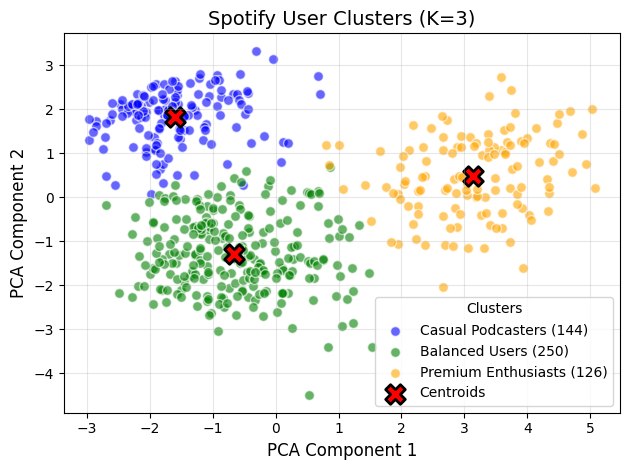

In [ ]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the dataset
df['Cluster'] = clusters

cluster_counts = df['Cluster'].value_counts().sort_index()
print("\nCluster Distribution:")
print(cluster_counts)

# Analyze cluster distribution
print(df['Cluster'].value_counts())

# Get cluster centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=cluster_df.columns)

# Print cluster centroids
print("\nCluster Centroids:\n", centroid_df)

# Visualizing Clusters (Use PCA to reduce dimensions to 2D)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Create a scatter plot with cluster colors and legend
# plt.figure(figsize=(10, 6))

# Define cluster colors and labels
cluster_colors = {0: 'blue', 1: 'green', 2: 'orange'}
cluster_labels = {0: 'Casual Podcasters (144)',
                 1: 'Balanced Users (250)',
                 2: 'Premium Enthusiasts (126)'}

# Plot each cluster separately with legend
for cluster_num, color in cluster_colors.items():
    mask = clusters == cluster_num
    plt.scatter(reduced_data[mask, 0], reduced_data[mask, 1],
                c=color, label=cluster_labels[cluster_num], alpha=0.6, edgecolors='w', s=50)

# Plot centroids
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0],
            pca.transform(kmeans.cluster_centers_)[:, 1],
            color='red', marker='X', s=200, label="Centroids", linewidths=2, edgecolor='black')

# Add labels and title
plt.title("Spotify User Clusters (K=3)", fontsize=14)
plt.xlabel("PCA Component 1", fontsize=12)
plt.ylabel("PCA Component 2", fontsize=12)

# Add legend with cluster sizes
plt.legend(title="Clusters")

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Adjust layout to prevent legend cutoff
plt.tight_layout()
plt.show()

In [ ]:
# Enhanced data preparation
def prepare_for_association_rules(df, columns_of_interest):
    transactions = []
    for _, row in df[columns_of_interest].iterrows():
        transaction = set()
        for col in columns_of_interest:
            # Skip null values
            if pd.isna(row[col]):
                continue

            # Handle multi-value columns
            if isinstance(row[col], str) and ',' in row[col]:
                items = [f"{col}:{item.strip()}" for item in row[col].split(',')]
                transaction.update(items)
            else:
                transaction.add(f"{col}:{str(row[col])}")
        transactions.append(list(transaction))
    return transactions

# Select more meaningful columns
association_cols = [
    'Age',
    'Gender',
    'preferred_listening_content',
    'fav_music_genre',
    'music_time_slot',
    'music_Influencial_mood',
    'spotify_listening_device',
    'spotify_subscription_plan',
    'premium_sub_willingness',
    'music_lis_frequency'
]

# Prepare transactions with better formatting
transactions = prepare_for_association_rules(df, association_cols)

# Filter out infrequent items
from collections import Counter
item_counts = Counter(item for transaction in transactions for item in transaction)
min_count = 20  # Adjust based on your dataset size
keep_items = {item for item, count in item_counts.items() if count >= min_count}
filtered_transactions = [[item for item in transaction if item in keep_items]
                        for transaction in transactions]

# Convert to one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(filtered_transactions).transform(filtered_transactions)
trans_df = pd.DataFrame(te_ary, columns=te.columns_)

# Generate frequent itemsets with higher min_support
frequent_itemsets = apriori(trans_df,
                           min_support=0.1,
                           use_colnames=True,
                           max_len=4)

rules = association_rules(frequent_itemsets,
                         metric="lift",
                         min_threshold=1.2,
                         support_only=False)
rules = rules[rules['confidence'] >= 0.7]

# Filter out trivial/uninteresting rules
def is_interesting(rule):
    # Avoid rules where consequent is just demographics
    consequents = list(rule.consequents)
    for cons in consequents:
        if any(cons.startswith(col) for col in ['Age:', 'Gender:']):
            return False
    return True

interesting_rules = rules[rules.apply(is_interesting, axis=1)]

# Sort and display
interesting_rules = interesting_rules.sort_values(['lift', 'confidence'], ascending=[False, False])

interesting_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values('lift', ascending=False).head(23)
# # Visualization of improved rules
# plt.figure(figsize=(12, 6))
# sns.scatterplot(data=interesting_rules, x='support', y='confidence',
#                 size='lift', hue='lift', palette='viridis', sizes=(20, 200))
# plt.title('Improved Association Rules: Support vs Confidence')
# plt.show()

,antecedents,consequents,support,confidence,lift
4569,(music_Influencial_mood:Social gatherings or p...,"(music_lis_frequency:leisure time, music_lis_f...",0.103846,0.771429,2.588018
180,"(Age:20-35, spotify_subscription_plan:Premium ...",(premium_sub_willingness:Yes),0.103846,0.818182,2.287390
62,(spotify_subscription_plan:Premium (paid subsc...,(premium_sub_willingness:Yes),0.138462,0.750000,2.096774
4610,(music_Influencial_mood:Social gatherings or p...,"(music_lis_frequency:leisure time, music_time_...",0.100000,0.742857,1.875173
4625,(music_Influencial_mood:Social gatherings or p...,"(music_lis_frequency:leisure time, preferred_l...",0.115385,0.857143,1.857143
4636,(music_Influencial_mood:Social gatherings or p...,"(music_lis_frequency:leisure time, spotify_lis...",0.115385,0.857143,1.834215
5727,(music_Influencial_mood:Social gatherings or p...,"(music_lis_frequency:leisure time, music_time_...",0.107692,0.708861,1.789357
5717,(music_Influencial_mood:Social gatherings or p...,"(music_lis_frequency:leisure time, preferred_l...",0.107692,0.823529,1.784314
5742,(music_Influencial_mood:Social gatherings or p...,"(music_lis_frequency:leisure time, preferred_l...",0.125000,0.822785,1.782700
4609,(music_Influencial_mood:Social gatherings or p...,"(music_lis_frequency:leisure time, music_Influ...",0.100000,0.764706,1.767320


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Select key preference features for  filtering
content_features = ['fav_music_genre', 'music_time_slot', 'preferred_listening_content',
                    'music_Influencial_mood', 'spotify_listening_device']

# Encode these categorical features
content_df = df[content_features].copy()
for col in content_df.columns:
    content_df[col] = label_encoders[col].transform(content_df[col].astype(str))

# Compute cosine similarity between users
similarity_matrix = cosine_similarity(content_df)

# Example: Get top N similar users for user at index 0
def get_similar_users(user_index, top_n=5):
    sim_scores = list(enumerate(similarity_matrix[user_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_users = [i for i, score in sim_scores[1:top_n+1]]
    return top_users

# Recommend items based on similar users’ preferences
def get_cb_recommendations(user_index, top_n=5):
    similar_users = get_similar_users(user_index, top_n)
    recs = df.loc[similar_users, content_features]
    return recs.mode().iloc[0].to_dict()

# Example: Content-based recommendations for user 0
cb_recs = get_cb_recommendations(0)
print("Recommendations for User 0:")
print(cb_recs)


Recommendations for User 0:
{'fav_music_genre': 'Pop', 'music_time_slot': 'Night', 'preferred_listening_content': 'Music', 'music_Influencial_mood': 'Uplifting and motivational', 'spotify_listening_device': 'Smartphone'}


In [ ]:
def get_cluster_based_recs(user_index):
    cluster_id = df.loc[user_index, 'Cluster']
    cluster_group = df[df['Cluster'] == cluster_id]
    return cluster_group[content_features].mode().iloc[0].to_dict()

def get_apriori_recs(user_index):
    user = df.loc[user_index]
    user_profile = set()
    for col in association_cols:
        val = user[col]
        if pd.isna(val): continue
        if isinstance(val, str) and ',' in val:
            items = [f"{col}:{v.strip()}" for v in val.split(',')]
            user_profile.update(items)
        else:
            user_profile.add(f"{col}:{val}")

    matches = []
    for _, rule in interesting_rules.iterrows():
        if rule['antecedents'].issubset(user_profile):
            matches.extend(list(rule['consequents']))
    return list(set(matches)) if matches else []

def ensemble_recommendation(user_index):
    print(f"\nGenerating Ensemble Recommendations for User {user_index}:\n")

    cb_recs = get_cb_recommendations(user_index)
    cl_recs = get_cluster_based_recs(user_index)
    apriori_recs = get_apriori_recs(user_index)

    # Merge all recs
    final_recs = {
        "Content-Based": cb_recs,
        "Cluster-Based": cl_recs,
        "Apriori-Based": apriori_recs
    }

    return final_recs

In [ ]:
from collections import Counter

def unified_ensemble_recommendation(user_index, score_threshold=0.7, top_k=5):
    cb_recs = get_cb_recommendations(user_index)
    cl_recs = get_cluster_based_recs(user_index)
    apriori_recs = get_apriori_recs(user_index)

    merged_recs = {}

    # Content-based (higher weight)
    for rank, (key, value) in enumerate(cb_recs.items()):
        merged_recs.setdefault(key, Counter())[value] += 3 / (rank + 1)

    # Cluster-based
    for rank, (key, value) in enumerate(cl_recs.items()):
        merged_recs.setdefault(key, Counter())[value] += 1 / (rank + 1)

    # Apriori-based (lower weight)
    for rank, item in enumerate(apriori_recs):
        if ":" in item:
            key, value = item.split(":", 1)
            merged_recs.setdefault(key, Counter())[value] += 0.5 / (rank + 1)

    # Select high-confidence, top-k final recommendations
    final_recommendations = {}
    scored_items = []

    for key, counter in merged_recs.items():
        value, score = counter.most_common(1)[0]
        if score >= score_threshold:
            scored_items.append((key, value, score))

    # Sort by score and limit to top_k
    top_items = sorted(scored_items, key=lambda x: x[2], reverse=True)[:top_k]

    for key, value, _ in top_items:
        final_recommendations[key] = value

    return final_recommendations


# Example usage for user 0
user_id = 0
final_recs = unified_ensemble_recommendation(user_id)

print(f"\n📋 Original Data for User {user_id}:")
print(df.iloc[user_id])

print(f"\n🎧 Final Ensemble Recommendations for User {user_id}:")
for feature, suggestion in final_recs.items():
    print(f"{feature}: {suggestion}")


📋 Original Data for User 0:
Age                                                         20-35
Gender                                                     Female
spotify_usage_period                            More than 2 years
spotify_listening_device       Smart speakers or voice assistants
spotify_subscription_plan                     Free (ad-supported)
premium_sub_willingness                                       Yes
preffered_premium_plan                   Family Plan-Rs 179/month
preferred_listening_content                               Podcast
fav_music_genre                                            Melody
music_time_slot                                             Night
music_Influencial_mood                      Sadness or melancholy
music_lis_frequency                                  leisure time
music_expl_method                                       Playlists
music_recc_rating                                               3
pod_lis_frequency                              

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score
import numpy as np
from collections import Counter

# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Function to evaluate the recommendation system
def evaluate_recommendations_on_test(df, test_df, k=5):
    hits = 0
    total = 0
    precisions = []
    recalls = []

    # Iterate over test users
    for user_id in test_df.index:
        ground_truth = set()

        # Define "liked" actual user preferences for test data
        for feature in ['fav_music_genre', 'music_time_slot', 'preferred_listening_content',
                        'music_Influencial_mood', 'spotify_listening_device']:
            val = test_df.at[user_id, feature]
            if pd.notna(val):
                ground_truth.add(f"{feature}:{val}")

        # Get recommendations from the training set
        recs = unified_ensemble_recommendation(user_id)

        predicted = set(f"{k}:{v}" for k, v in recs.items())

        # Metrics calculation
        common = ground_truth.intersection(predicted)
        hits += len(common)
        total += len(ground_truth)

        if ground_truth:
            precision = len(common) / len(predicted) if predicted else 0
            recall = len(common) / len(ground_truth)
        else:
            precision, recall = 0, 0

        precisions.append(precision)
        recalls.append(recall)

    # Compute average precision, recall, and hit rate
    avg_precision = np.mean(precisions)
    avg_recall = np.mean(recalls)
    hit_rate = hits / total if total > 0 else 0

    print(f"Evaluation Results:")
    print(f"Precision@{k}: {avg_precision:.4f}")
    print(f"Recall@{k}: {avg_recall:.4f}")
    print(f"Hit Rate: {hit_rate:.4f}")

# Train on the full training data and evaluate on the test data
evaluate_recommendations_on_test(train_df, test_df)

Evaluation Results:
Precision@5: 0.8091
Recall@5: 0.7692
Hit Rate: 0.7692
